In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#import data set
df = pd.read_csv('price_pivot.csv')

In [3]:
scaler = StandardScaler()
df['scaled_A'] = scaler.fit_transform(df['A'].values.reshape(-1, 1))

In [4]:
df.head()

,date,A,B,C,D,E,scaled_A
0,2022-08-28,54.500000,50.840000,29.920000,21.286667,31.943333,-2.043023
1,2022-08-29,54.870000,39.526667,34.060000,42.946667,22.993333,-2.028754
2,2022-08-30,54.483333,40.183333,32.520000,40.583333,26.693333,-2.043666
3,2022-08-31,52.096667,41.420000,32.293333,31.693333,26.850000,-2.135711
4,2022-09-01,51.770000,43.150000,36.340000,46.303333,31.306667,-2.148310


In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.head()

,date,A,B,C,D,E,scaled_A
0,2022-08-28,54.500000,50.840000,29.920000,21.286667,31.943333,-2.043023
1,2022-08-29,54.870000,39.526667,34.060000,42.946667,22.993333,-2.028754
2,2022-08-30,54.483333,40.183333,32.520000,40.583333,26.693333,-2.043666
3,2022-08-31,52.096667,41.420000,32.293333,31.693333,26.850000,-2.135711
4,2022-09-01,51.770000,43.150000,36.340000,46.303333,31.306667,-2.148310


In [7]:
len(df)

761

In [8]:
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
window_size = 10
X, y = create_sequences(df['scaled_A'][:train_size].values, window_size)
X_test, y_test = create_sequences(df['scaled_A'][train_size:].values, window_size)

In [9]:
X.shape

(598, 10)

In [10]:
y

array([-2.16605024e+00, -2.15075223e+00, -2.14895246e+00, -2.08943162e+00,
       -2.08891740e+00, -2.09431670e+00, -2.13365445e+00, -2.09740201e+00,
       -2.24215464e+00, -2.11257147e+00, -2.15448032e+00, -2.14830969e+00,
       -2.15653719e+00, -2.17517763e+00, -2.17954849e+00, -2.25269613e+00,
       -2.26413750e+00, -2.28496337e+00, -2.27043669e+00, -2.27249356e+00,
       -2.17453485e+00, -2.06873431e+00, -2.00792792e+00, -2.00998479e+00,
       -2.00844214e+00, -2.02245460e+00, -2.06127813e+00, -2.11141448e+00,
       -2.02374015e+00, -1.96190532e+00, -1.96421931e+00, -1.96537630e+00,
       -1.95766302e+00, -1.90585546e+00, -1.89647096e+00, -1.91292597e+00,
       -1.89197155e+00, -1.90791233e+00, -1.91164042e+00, -1.94005102e+00,
       -1.89942772e+00, -1.89312854e+00, -1.77640084e+00, -1.71443746e+00,
       -1.68679819e+00, -1.65697349e+00, -1.64501790e+00, -1.64797466e+00,
       -1.62303504e+00, -1.63421930e+00, -1.61802140e+00, -1.65157419e+00,
       -1.64720333e+00, -

In [11]:
# Reshape for LSTM: [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [12]:
X.shape

(598, 10, 1)

In [13]:
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(window_size, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.3990 - val_loss: 0.2619
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.3990 - val_loss: 0.2619
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0651 - val_loss: 0.0888
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0651 - val_loss: 0.0888
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0275 - val_loss: 0.0281
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0275 - val_loss: 0.0281
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0237 - val_loss: 0.0294
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0237 - val_loss: 0.0294
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0203 - val_loss: 0.0342
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0203 - val_loss: 0.0342
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0202 - val_loss: 0.0304
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0202

In [15]:
predictions = model.predict(X_test)

# Inverse transform to original scale
predicted_values = scaler.inverse_transform(predictions)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


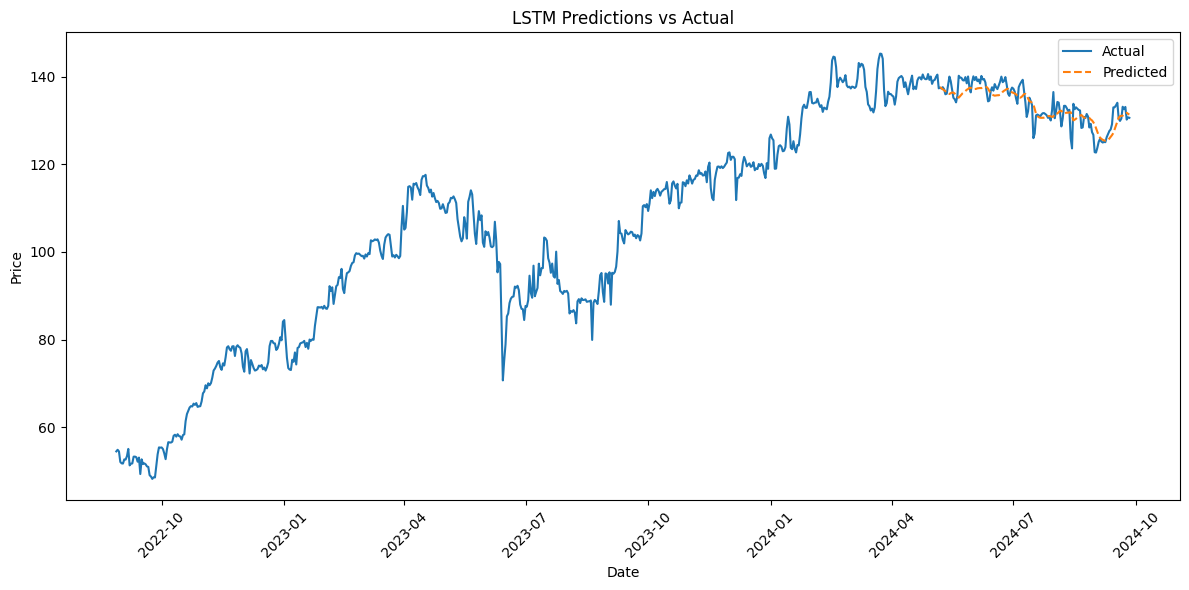

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['A'], label='Actual')
plt.plot(df['date'][train_size + window_size:], predicted_values.flatten(), label='Predicted', linestyle='--')
plt.title('LSTM Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
